<a href="https://colab.research.google.com/github/MohammadQasim03/Intelligence-Systems-C0559/blob/main/NEWWWWWWWWWWWWWWCopy_of_IRIS_CNN_NEW_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 1.1334 - accuracy: 0.2396 - val_loss: 2346.4563 - val_accuracy: 0.1250
Epoch 2/600
1/1 [==============================] - 0s 71ms/step - loss: 2424.3601 - accuracy: 0.2708 - val_loss: 1479.8241 - val_accuracy: 0.3750
Epoch 3/600
1/1 [==============================] - 0s 62ms/step - loss: 1734.5609 - accuracy: 0.3229 - val_loss: 1514.9790 - val_accuracy: 0.6250
Epoch 4/600
1/1 [==============================] - 0s 40ms/step - loss: 1011.9268 - accuracy: 0.6771 - val_loss: 1043.6747 - val_accuracy: 0.6250
Epoch 5/600
1/1 [==============================] - 0s 57ms/step - loss: 561.2952 - accuracy: 0.6771 - val_loss: 521.1745 - val_accuracy: 0.7083
Epoch 6/600
1/1 [==============================] - 0s 61ms/step - loss: 249.8986 - accuracy: 0.6875 - val_loss: 213.2143 - val_accuracy: 0.7500
Epoch 7/600
1/1 [==============================] - 0s 61ms/step - loss: 78.9900 - accuracy: 0.8021 - val_loss: 126.9997 - val_accurac

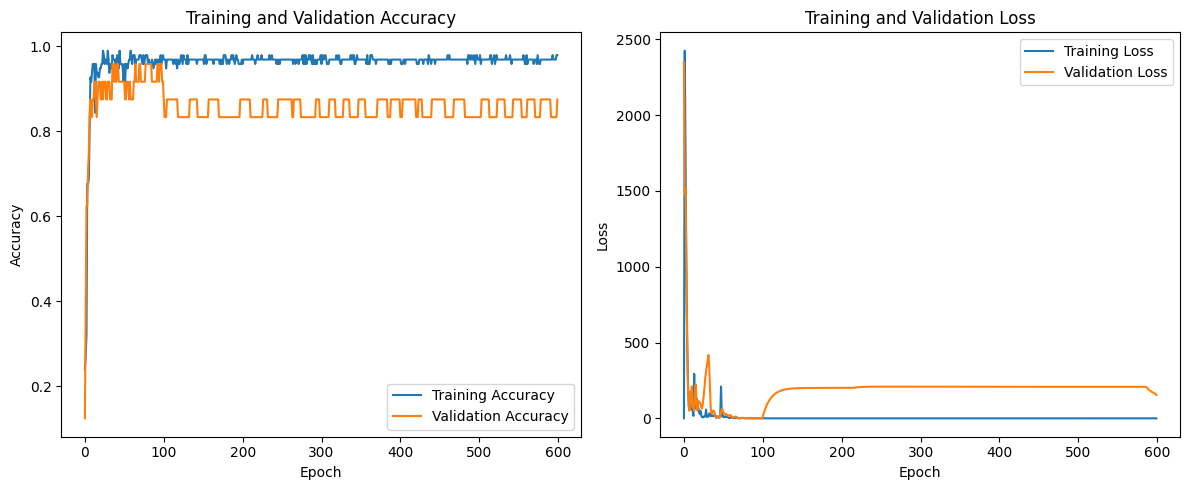

1/1 [==============================] - 0s 26ms/step - loss: 10.9522 - accuracy: 0.9667
Test accuracy: 96.67%
1/1 [==============================] - 0s 73ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



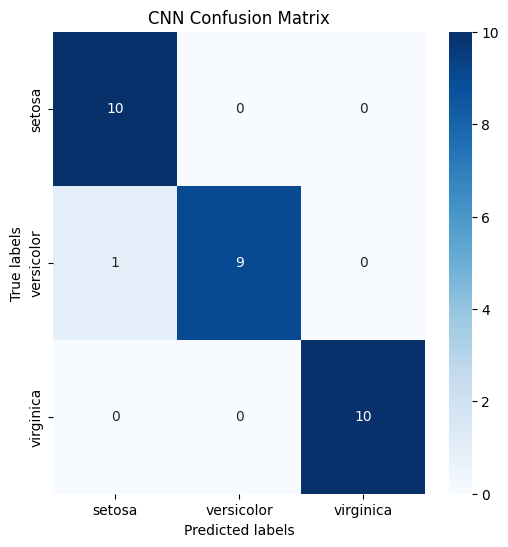

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for 1D convolutional layer
X_reshaped = X_scaled[:, :, np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, stratify=y_encoded, random_state=0)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')  # Adjust output units based on classes
])

# # Compile the model with an adjusted learning rate
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# # Train the model with batch size
# history = model.fit(X_train, y_train, epochs=600, validation_split=0.2, batch_size=32)

# Compile the model with an adjusted learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1), metrics=['accuracy'])

# Train the model with batch size
history = model.fit(X_train, y_train, epochs=600, validation_split=0.2, batch_size=100)

# Display model summary
model.summary()

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy history
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss history
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions and display classification report and confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("CNN Confusion Matrix")
plt.show()
